# **DATA SET 2: _Crime.CSV_**

In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import math
data = pd.read_csv('crime.csv')
# data

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Histogram dan boxplot

TAHUN:


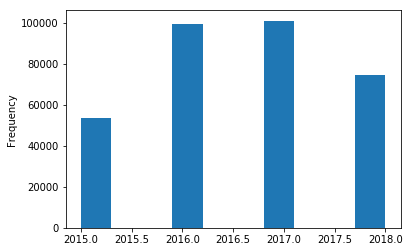

In [64]:
data['YEAR'].plot(kind='hist')
print('TAHUN:')

TAHUN:


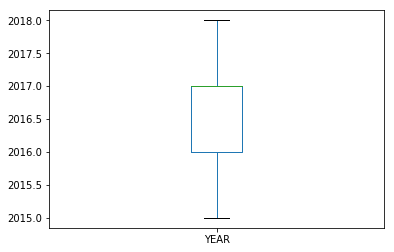

In [67]:
data['YEAR'].plot(kind='box')
print('TAHUN:')

Waktu Kejadian:


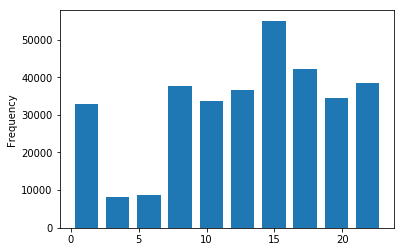

In [18]:
data['HOUR'].plot(kind='hist', rwidth=.75)
print('Waktu Kejadian:')

Waktu kejadian:


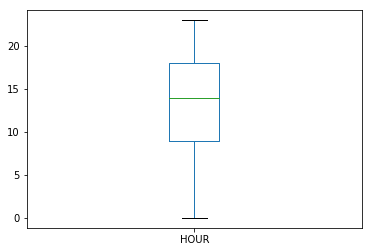

In [68]:
data['HOUR'].plot(kind='box')
print('Waktu kejadian:')

LONG:


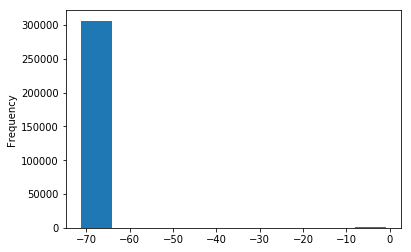

In [65]:
data['Long'].plot(kind='hist')
print('LONG:')

Long:


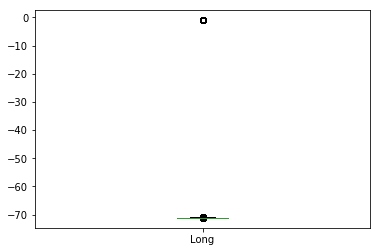

In [69]:
data['Long'].plot(kind='box')
print('Long:')

In [66]:
data['Lat'].plot(kind='hist')
print('Lat:')

Lat:


Lat:


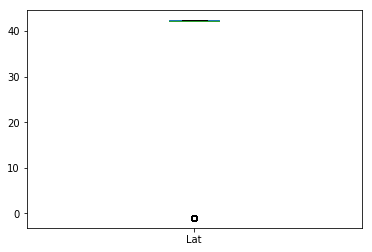

In [70]:
data['Lat'].plot(kind='box')
print('Lat:')

In [76]:
data['OFFENSE_CODE_GROUP'].value_counts().plot(kind='hist', rwidth= .75)
print('Jumlah dan frekuensi dari jenis kejahatan: ')

Jumlah dan frekuensi dari jenis kejahatan: 


Jumlah dan frekuensi dari jenis kejahatan: 


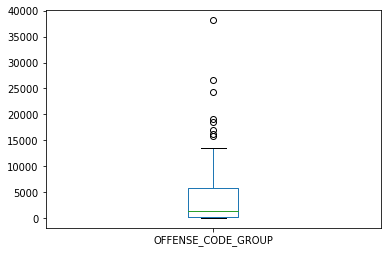

In [77]:
data['OFFENSE_CODE_GROUP'].value_counts().plot(kind='box')
print('Jumlah dan frekuensi dari jenis kejahatan: ')

## Rerata, nilai minimum dan maksimum, serta standar deviasi

In [4]:
data.describe()

OFFENSE_CODE           YEAR          MONTH           HOUR  \
count  327820.000000  327820.000000  327820.000000  327820.000000   
mean     2317.961171    2016.598676       6.672213      13.114840   
std      1184.990073       1.009775       3.253984       6.292714   
min       111.000000    2015.000000       1.000000       0.000000   
25%      1001.000000    2016.000000       4.000000       9.000000   
50%      2907.000000    2017.000000       7.000000      14.000000   
75%      3201.000000    2017.000000       9.000000      18.000000   
max      3831.000000    2018.000000      12.000000      23.000000   

                 Lat           Long  
count  307188.000000  307188.000000  
mean       42.212995     -70.906030  
std         2.173496       3.515832  
min        -1.000000     -71.178674  
25%        42.297466     -71.097081  
50%        42.325552     -71.077493  
75%        42.348624     -71.062482  
max        42.395042      -1.000000

## Modus

In [5]:
data.mode()


INCIDENT_NUMBER  OFFENSE_CODE               OFFENSE_CODE_GROUP  \
0      I162030584        3006.0  Motor Vehicle Accident Response   
1             NaN           NaN                              NaN   

             OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0  SICK/INJURED/MEDICAL - PERSON       B2                       Y   
1                            NaN      NaN            NaN      NaN   

      OCCURRED_ON_DATE    YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2016-08-01 00:00:00  2017.0    8.0      Friday  17.0  Part Three   
1  2017-06-01 00:00:00     NaN    NaN         NaN   NaN         NaN   

          STREET        Lat       Long                  Location  
0  WASHINGTON ST  42.348624 -71.082776  (0.00000000, 0.00000000)  
1            NaN        NaN        NaN                       NaN

## Variansi

In [6]:
data.var()

OFFENSE_CODE    1.404201e+06
YEAR            1.019645e+00
MONTH           1.058841e+01
HOUR            3.959825e+01
Lat             4.724085e+00
Long            1.236107e+01
dtype: float64

## Skew

In [7]:
data.skew()

OFFENSE_CODE    -0.410645
YEAR            -0.083805
MONTH           -0.119591
HOUR            -0.482938
Lat            -19.827352
Long            19.831624
dtype: float64

## Kurtosis

In [8]:
data.kurtosis()

OFFENSE_CODE     -1.415226
YEAR             -1.090411
MONTH            -1.035742
HOUR             -0.600736
Lat             391.211516
Long            391.324226
dtype: float64

# Jika terdapat 1000 kejahatan baru tentukan ekspektasi kejahatan yang:

## *Semua kejahatan dihitung menggunakan distribusi binomial

## _Homicide_:

### Data jumlah kejahatan:

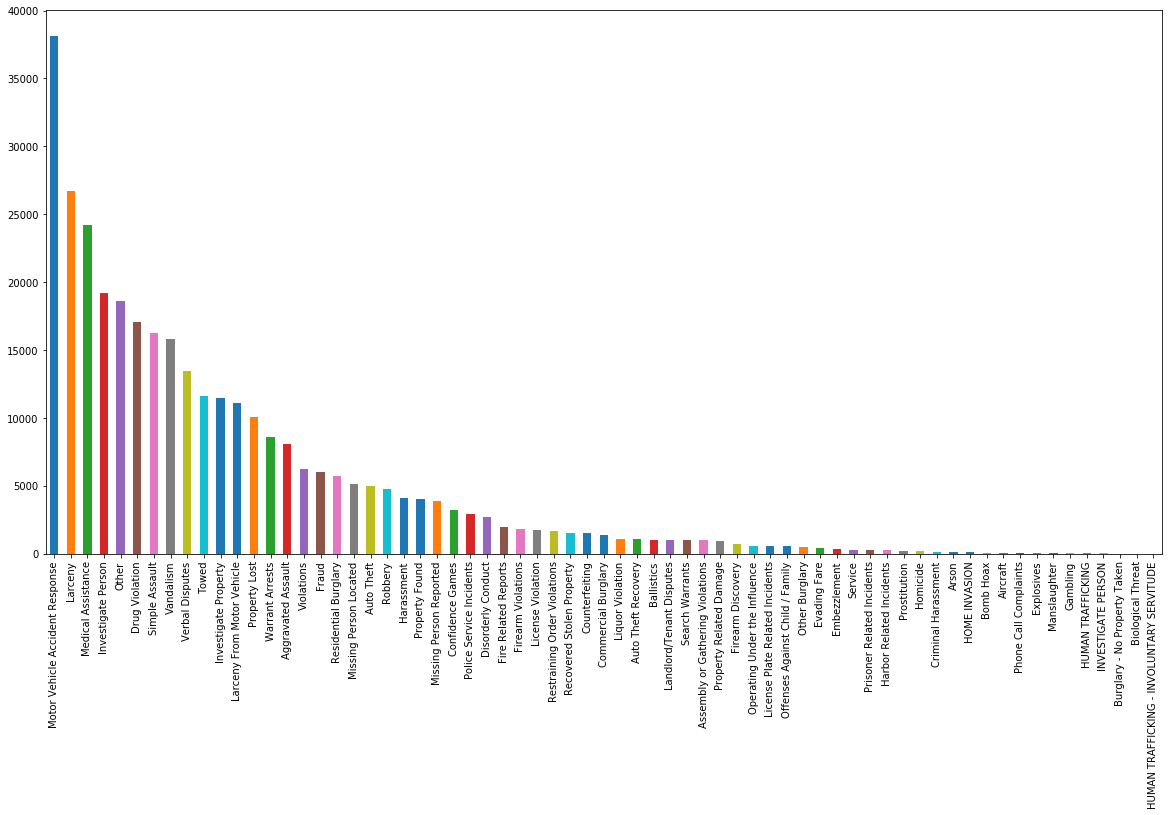

In [9]:
data['OFFENSE_CODE_GROUP'].value_counts().plot(kind='bar', figsize=(20,10))

### Peluang terjadinya homicide: 

In [10]:
offenseRecord = data['OFFENSE_CODE_GROUP'].value_counts()
homicideProbability = offenseRecord['Homicide']/len(data['OFFENSE_CODE_GROUP'])
homicideProbability

0.0005033249954243183

## Ekspektasi jumlah _homicide_ pada 1000 kasus selanjutnya:

In [11]:
print(1000 * homicideProbability)
print("Maka ekspektasi _homicide_ pada 1000 kasus kejahatan adalah sejumlah 1 kasus")

0.5033249954243183
Maka ekspektasi _homicide_ pada 1000 kasus kejahatan adalah sejumlah 1 kasus


### Data kejahatan yang melibatkan _shooting_

In [12]:
offenseWithShooting = data[['OFFENSE_CODE_GROUP', 'SHOOTING']].dropna()
offenseWithShooting['OFFENSE_CODE_GROUP'].value_counts()

Aggravated Assault                 539
Homicide                           123
Warrant Arrests                     78
Firearm Violations                  74
Ballistics                          45
Drug Violation                      33
Search Warrants                     30
Medical Assistance                  20
Robbery                             19
Vandalism                           17
Investigate Property                15
Other                               15
Investigate Person                   8
Motor Vehicle Accident Response      6
HOME INVASION                        5
Simple Assault                       5
Towed                                4
Disorderly Conduct                   3
Firearm Discovery                    3
Property Found                       3
Violations                           2
Property Lost                        2
Recovered Stolen Property            2
Property Related Damage              1
Missing Person Located               1
Police Service Incidents 

### Jumlah _homicide_ yang melibatkan _shooting_:

In [13]:
homicideWithShootingProbability = offenseWithShooting['OFFENSE_CODE_GROUP'].value_counts()['Homicide']/len(data['OFFENSE_CODE_GROUP'])
homicideWithShootingProbability

0.00037520590567994633

## Ekspektasi jumlah _homicide_ dengan _shooting_ dalam 1000 kasus kejahatan baru:

In [14]:
homicideWithShootingProbability*1000
print(1000 * homicideWithShootingProbability)
print("Maka ekspektasi _homicide_ dengan _shooting_ pada 1000 kasus kejahatan adalah sejumlah 1 kasus")

0.3752059056799463
Maka ekspektasi _homicide_ dengan _shooting_ pada 1000 kasus kejahatan adalah sejumlah 1 kasus


### Peluang kejahatan hari Sabtu jam _8 malam_:

In [46]:
print("peluang kejahatan hari Sabtu jam 8 malam:",len(data.loc[(data.HOUR == 20) & (data.DAY_OF_WEEK == 'Saturday')])/len(data))



peluang kejahatan hari Sabtu jam 8 malam: 0.006683545848331402


### Diagram tingkat kejahatan per jam pada hari Sabtu:

In [50]:
crimes = data.loc[(data.DAY_OF_WEEK == 'Saturday')]
crimesByHour = crimes['HOUR'].value_counts().sort_index()
crimesByHour.plot(kind='bar')

### Jumlah kejahatan di _Geneva Ave_ atau _Prescott Street_

In [16]:
# Geneva Ave
numOfCrimesOnGenevaAve = len(data.loc[data.STREET == 'GENEVA AVE'])
print('Jumlah kejahatan di Geneva Ave: ',numOfCrimesOnGenevaAve)

# Prescott Street
numOfCrimesOnPrescottSt = len(data.loc[data.STREET == 'PRESCOTT ST'])
print('Jumlah kejahatan di Prescott Street: ',numOfCrimesOnPrescottSt)

Jumlah kejahatan di Geneva Ave:  1681
Jumlah kejahatan di Prescott Street:  158


### Peluang kejahatan terjadi di Geneva Ave atau Prescott St.

In [17]:
totalProb = (numOfCrimesOnGenevaAve + numOfCrimesOnPrescottSt) / len(data.index)
totalProb

0.005609785858092856

## Ekspektasi jumlah kejahatan terjadi di Geneva Ave atau Prescott St. pada 2000 kasus kejahatan baru

In [18]:
print('Ekspektasi jumlah kasus: ', math.ceil(2000 * totalProb), 'kasus')

Ekspektasi jumlah kasus:  12 kasus


### Dilaporkan di Kantor Polisi Nomor 495 dan District E18

In [19]:
# Dilaporkan di Reporting area 495 dan distrik E18
numOfCrimesReportedOn495AndE18 = len(data.loc[(data.REPORTING_AREA == '495') & (data.DISTRICT == 'E18')])
print('Jumlah kejahatan yang dilaporkan di daerah nomor 495 dan distrik E18: ', numOfCrimesReportedOn495AndE18)

Jumlah kejahatan yang dilaporkan di daerah nomor 495 dan distrik E18:  495


In [20]:
numOfCrimesOnWorkDay = len(data.loc[(data.DAY_OF_WEEK != 'Saturday') & (data.DAY_OF_WEEK != 'Sunday')])
print('Jumlah kejahatan yang terjadi pada hari kerja: ', numOfCrimesOnWorkDay)

Jumlah kejahatan yang terjadi pada hari kerja:  240477


In [21]:
totalProbCrimesOnWorkDay = len(data.loc[(data.DAY_OF_WEEK != 'Saturday') & (data.DAY_OF_WEEK != 'Sunday')])/ len(data.index)

## Ekspektasi jumlah kejahatan pada hari kerja pada 2000 kasus baru:

In [22]:
totalProbCrimesOnWorkDay = len(data.loc[(data.DAY_OF_WEEK != 'Saturday') & (data.DAY_OF_WEEK != 'Sunday')])/ len(data.index)
print('Ekspektasi jumlah kasus: ', math.ceil(2000 * totalProbCrimesOnWorkDay), 'kasus')

Ekspektasi jumlah kasus:  1468 kasus


# Dataset_3 : Black Friday

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sb

In [9]:
data = pd.read_csv("black_friday.csv")

# **VISUALISASI DATA**

### Visualisasi histogram

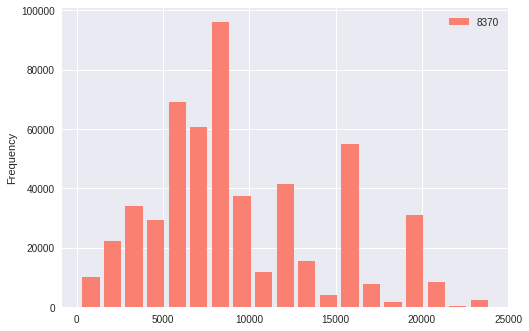

In [0]:
data.plot(kind="hist", rwidth=.8, color="salmon", bins=19)

### Visualisasi Box Plot

In [0]:
data.boxplot()

# **DATA STATISTIK**

### Maximum Value, Minimum Value, Mean, Median, and Standard Deviation

In [0]:
data.describe()

8370
count  422363.000000
mean     9327.787124
std      4977.553083
min        86.000000
25%      5865.000000
50%      8061.000000
75%     12069.000000
max     23961.000000

## Mode

In [0]:
data.mode()

8370
0  7193

## Variance

In [0]:
data.var()

8370    2.477603e+07
dtype: float64

## Skewness

In [0]:
data.skew()

8370    0.624184
dtype: float64

## Kurtosis

In [0]:
data.kurtosis()

8370   -0.340037
dtype: float64

# **FUNGSI DISTRIBUSI PELUANG**

Berdasarkan grafik fungsi histogramnya, data set tersebut lebih condong ke **distribusi binomial**

# **JAWABAN PERTANYAAN**

## PERTANYAAN 1

In [10]:
miskin = len(data.loc[data["8370"]<1000])
pmiskin = miskin/len(data)
kaya = len(data.loc[(data["8370"]>10000) & (data["8370"]<20000)])
pkaya = kaya/len(data)
crazy = len(data.loc[data["8370"]>20000])
pcrazy = crazy/len(data)

### Ekspektasi Jumlah Orang Miskin Dari 250 Data

In [11]:
binom.rvs(size=10,n=250,p=pmiskin)

data_binom = binom.rvs(n=250,p=pmiskin,loc=0,size=1000)
ax = sb.distplot(data_binom,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial')]

In [46]:
res = 250*pmiskin
print("Nilai ekspektasi jumlah orang yang miskin adalah", res)

Nilai ekspektasi jumlah orang yang miskin adalah 3.275815884637707


### Ekspektasi Jumlah Orang Kaya Dari 250 Data

In [12]:
binom.rvs(size=1000,n=250,p=pkaya)

data_binom = binom.rvs(n=250,p=pkaya,loc=0,size=1000)
ax = sb.distplot(data_binom,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial')]

In [52]:
res = 250*pkaya
print("Nilai ekspektasi jumlah orang yang kaya adalah", res)

Nilai ekspektasi jumlah orang yang kaya adalah 80.98203788859622


In [13]:
binom.rvs(size=10,n=250,p=pcrazy)

data_binom = binom.rvs(n=250,p=pcrazy,loc=0,size=1000)
ax = sb.distplot(data_binom,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial')]

In [58]:
res = 250*pcrazy
print("Nilai ekspektasi jumlah orang yang crazy rich adalah", res)

Nilai ekspektasi jumlah orang yang crazy rich adalah 5.820107296456687


## PERTANYAAN 2

In [5]:
fold = len(data.loc[(data["8370"]>=1980) & (data["8370"]<=2000)])
pfold = fold/len(data)
apple = len(data.loc[(data["8370"]>=2707) & (data["8370"]<=2897)])
papple = apple/len(data)

### Ekspektasi Jumlah Orang yang Pengeluarannya Setara Galaxy Fold Dari 1000 Data

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial')]

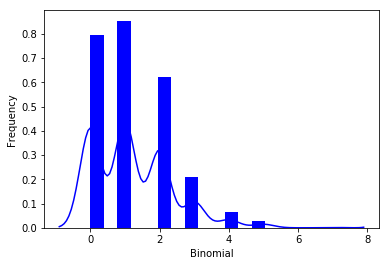

In [14]:
binom.rvs(size=10,n=1000,p=pfold)

data_binom = binom.rvs(n=1000,p=pfold,loc=0,size=1000)
ax = sb.distplot(data_binom,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

In [66]:
res = 1000*pfold
print("Nilai ekspektasi jumlah orang yang pengeluarannya setara dengan Galaxy Fold adalah", res)

Nilai ekspektasi jumlah orang yang pengeluarannya setara dengan Galaxy Fold adalah 1.235174189323928


### Ekspektasi Jumlah Orang yang Pengeluarannya Setara MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 Dari 1000 Data

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial')]

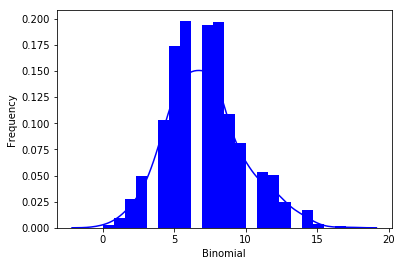

In [7]:
binom.rvs(size=10,n=1000,p=papple)

data_binom = binom.rvs(n=1000,p=papple,loc=0,size=1000)
ax = sb.distplot(data_binom,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

# Dataset 4 : Criptocurrency

In [8]:
res = 1000*papple
print("Nilai ekspektasi jumlah orang yang pengeluarannya setara dengan Produk Apple di atas adalah", res)

Nilai ekspektasi jumlah orang yang pengeluarannya setara dengan Produk Apple di atas adalah 7.1747994702144435


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import special

In [2]:
data = pd.read_csv("crypto.csv", names=["crypto"])

# **VISUALISASI DATA**

### Visualisasi histogram

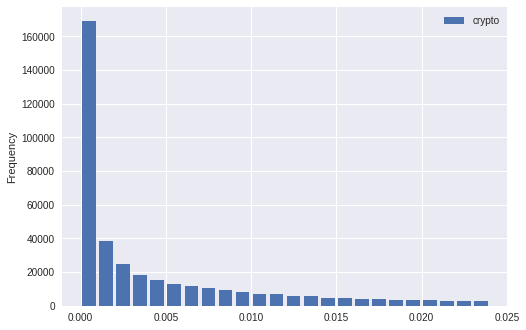

In [59]:
data.plot(kind="hist", rwidth=.8, bins=np.arange(0,0.025,0.001))

### Visualisasi Box Plot

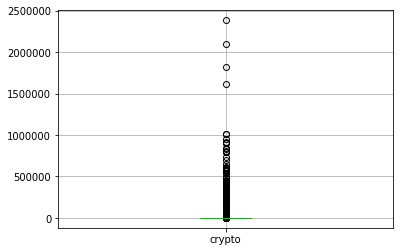

In [3]:
data.boxplot()

# **DATA STATISTIK**

### Maximum Value, Minimum Value, Mean, Median, and Standard Deviation

In [61]:
data.describe()

crypto
count  6.322180e+05
mean   2.030181e+02
std    8.678734e+03
min    2.925000e-09
25%    8.070000e-04
50%    9.733500e-03
75%    1.198202e-01
max    2.383502e+06

## Mode

In [0]:
data.mode()

crypto
0  0.000002

## Variance

In [0]:
data.var()

crypto    7.532042e+07
dtype: float64

## Skewness

In [0]:
data.skew()

crypto    118.239608
dtype: float64

## Kurtosis

In [0]:
data.kurtosis()

crypto    22297.470843
dtype: float64

# **FUNGSI DISTRIBUSI PELUANG**

Berdasarkan grafik fungsi histogramnya, data set tersebut lebih condong ke **distribusi gamma**

# **JAWABAN PERTANYAAN**

alpha x beta = mean


alpha x beta^2 = std^2

Sehingga...

**beta = (std^2)/mean**

**alpha = mean/beta**

## PERTANYAAN 1

In [0]:
beta = (pow(data.std(),2) / data.mean())
alpha = data.mean()/beta 

### Ekspektasi Jumlah Crytocurrency Baru yang Nilainya Kurang Dari 0.177013 Dari 1000 Data

In [0]:
prob = special.gammainc(alpha, (0.177013/beta))
print(prob*1000)

crypto    992.379827
dtype: float64


### Ekspektasi Jumlah Crytocurrency Baru yang Nilainya Lebuh Dari 177.013 Dari 1000 Data

In [0]:
prob = 1 - special.gammainc(alpha, (177.013/beta))
print(prob*1000)

crypto    3.86212
dtype: float64


## PERTANYAAN 2

### Peluang Crytocurrency Tersebut Nilainya Lebih Dari 0.013

In [0]:
print(1 - special.gammainc(alpha, (0.013/beta)))

crypto    0.009037
dtype: float64


### Peluang Crytocurrency Tersebut Nilainya Kurang Dari 17.7

In [0]:
print(special.gammainc(alpha, (17.7/beta)))

crypto    0.994884
dtype: float64


# Dataset_5 : Athlete

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('athletes.csv')


## **VISUALISASI DATA JUMLAH MEDAL DENGAN HISTOGRAM**

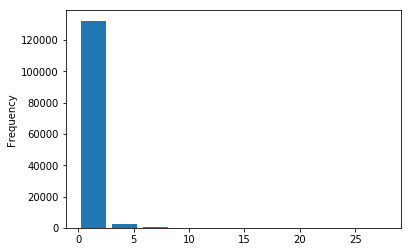

In [4]:
dataMedal = data['Medal']
dataMedal.plot(kind='hist', rwidth=.8)

## **VISUALISASI DATA DENGAN BOX PLOT**

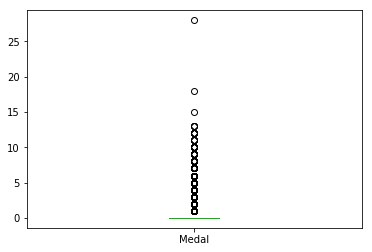

In [5]:
dataMedal.plot(kind="box")

## **_Skew_**

In [0]:
dataMedal.skew()


4.8199987845312

## **_Kurtosis_**

In [0]:
dataMedal.kurtosis()

51.562525836059855

## **_Variansi_**

In [0]:
dataMedal.var()


0.5252132778008305

## **_Modus_**

In [0]:
modus = dataMedal.mode()
modus[0]

0

## Maximum Value, Minimum Value, Mean, Median, and Standard Deviation

In [0]:
dataMedal.describe()

count    134731.000000
mean          0.295277
std           0.724716
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          28.000000
Name: Medal, dtype: float64

# **FUNGSI DISTRIBUSI PELUANG**

Berdasarkan grafik fungsi histogramnya, data set tersebut lebih condong ke **distribusi binomial**

## Total data jumlah _athlete_ pada database

In [0]:
numberOfAthletes = len(data.index)

## Fungsi penghitung peluang

In [0]:
medalCount = data['Medal'].value_counts()


def probabilityGetNMedals(listN):
    #N adalah list jumlah medal yang ingin dicari peluangnya
    #probabilityGetNMedals([1,5]) -> peluang mendapat 1 atau 5 medali
    totalAthletes = len(data.index)
    totalProbability = 0.0
    for numOfMedal in listN:
        totalProbability += medalCount[numOfMedal] 
        
    return totalProbability / totalAthletes

def probabilityGetMoreThanNMedals(N):
    #N adalah batas bawah (tidak termasuk yang dihitung) dari jumlah medal yang ingin dicari peluangnya
    totalAthletes = len(data.index)
    totalProbability = 0.0
    indexes = medalCount.index.values
    for idx in indexes:
        if (idx > N):
            totalProbability += medalCount[idx]
        
    return totalProbability  / totalAthletes
   

## Peluang Y meraih tepat 0 medali

In [0]:
probabilityGetNMedals([0])

0.7906792052311643

## Peluang Y meraih lebih dari 10 medali

In [0]:
probabilityGetMoreThanNMedals(10)

0.00015586613325812174

## Peluang Y meraih tepat 3 medali

In [0]:
probabilityGetNMedals([3])

0.01027974259821422

## Peluang Y meraih 1 atau 5 medali

In [0]:
probabilityGetNMedals([1,5])

0.1588424341836697

## _Confidence Interval 95%_

In [0]:
'''
Menghitung confidence interval 95%
'''
import math


mean = dataMedal.mean() #Rerata jumlah medali yang didapat
intervalZValue = 1.96 #dari tabel z-value A-3 di walpole 9th ed.
stdDeviation = dataMedal.std() #Simpangan baku
numOfSamples = len(data.index) #Jumlah semua atlet pada data


### _Lower bound_

In [0]:
lowerBoundInterval = mean - intervalZValue * (stdDeviation / math.sqrt(numOfSamples))
lowerBoundInterval

0.29140744161222804

### _Upper bound_

In [0]:
upperBoundInterval = mean + intervalZValue * (stdDeviation / math.sqrt(numOfSamples))
upperBoundInterval

0.29914707071232977